In [1]:
import torch
import torch.nn as nn
# from torch.utils.data import Dataset
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [2]:
# 超参数
BATCH_SIZE = 32
EPOCHS = 20
LR = 0.001


In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class NoisyMNIST(Dataset):
    def __init__(self, root, train=True, download=True, transform=None):
        self.mnist = datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.transform = transform

    def __len__(self):
        return len(self.mnist)

    def __getitem__(self, index):
        img, label = self.mnist[index]
        # 将标签转换为32维的One-Hot向量
        one_hot = torch.zeros(32)
        one_hot[label] = 1.0  # 原标签对应位置设为1.0
        # 生成0-0.5的均匀噪声
        noise = torch.rand(32) * 0.5
        # 添加噪声后的标签
        noisy_label = one_hot + noise
        return img, noisy_label

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 创建数据集和数据加载器
train_dataset = NoisyMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 验证数据样例
images, noisy_labels = next(iter(train_loader))
print("原始标签形状:", images.shape)          # 输出: torch.Size([64, 1, 28, 28])
print("噪声标签形状:", noisy_labels.shape)    # 输出: torch.Size([64, 32])
print("第一个噪声标签示例:")
print(noisy_labels[0])  # 示例输出: tensor([0.1234, 0.4567, 1.3829, ...])

原始标签形状: torch.Size([64, 1, 28, 28])
噪声标签形状: torch.Size([64, 32])
第一个噪声标签示例:
tensor([0.1694, 0.2347, 0.3527, 0.3346, 0.0308, 0.4133, 0.0314, 1.2060, 0.2516,
        0.2164, 0.0465, 0.1896, 0.1412, 0.2091, 0.2360, 0.0999, 0.1670, 0.4615,
        0.4439, 0.2747, 0.0694, 0.1286, 0.0369, 0.4009, 0.4470, 0.1507, 0.1322,
        0.0227, 0.2428, 0.2304, 0.1822, 0.3133])


In [3]:


class SyntheticDataset(Dataset):
    def __init__(self, num_samples=None, root='./data', train=True, download=True):
        # 加载MNIST数据集
        self.mnist = MNIST(
            root=root,
            train=train,
            download=download,
            transform=transforms.Compose([
                transforms.Resize((100, 100)),  # 调整图像大小为100x100
                transforms.ToTensor(),          # 转换为Tensor并归一化到[0,1]
                transforms.Lambda(lambda x: x * 255)  # 转换为0-255灰度值
            ])
        )
        
    def __len__(self):
        return len(self.mnist)

    def __getitem__(self, idx):
        # 返回格式：(参数=标签, 图像)
        image, label = self.mnist[idx]
        params = torch.tensor(label, dtype=torch.float32)  # 标签作为输入参数（1维）
        return params, image.squeeze(0)  # 图像尺寸: 100x100

In [13]:
np.random.rand(32,32)

array([[0.50903331, 0.80734834, 0.80300089, ..., 0.62000118, 0.0667562 ,
        0.22208597],
       [0.21082167, 0.37193065, 0.77968058, ..., 0.43686016, 0.00294363,
        0.99813009],
       [0.23896677, 0.0402463 , 0.07767635, ..., 0.86788797, 0.02743737,
        0.80268616],
       ...,
       [0.154252  , 0.37850365, 0.77117278, ..., 0.14384482, 0.24968742,
        0.43368768],
       [0.20366518, 0.08149637, 0.68136348, ..., 0.97016755, 0.55473693,
        0.87066319],
       [0.17561574, 0.20866526, 0.66257102, ..., 0.94703868, 0.72364766,
        0.90317613]])

In [15]:
# 加载MNIST数据集
dataset = SyntheticDataset(root='./data')
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

for params, images in dataloader:
    noise = np.random.rand(32,32)
    newLabel = np.zeros_like(noise)
    for i in range(params.shape[0]):
        newLabel[int(params[i])] = 1
    params = noise + newLabel


    print(params)

[[1.0726527  1.60888262 1.55907058 ... 1.97524482 1.54053933 1.03677667]
 [1.36422782 1.59889517 1.33464257 ... 1.02847918 1.45965021 1.37752616]
 [1.23790253 1.75329108 1.66566474 ... 1.24480778 1.9443133  1.82547885]
 ...
 [0.61795874 0.35514192 0.49649292 ... 0.8631505  0.84496545 0.63324465]
 [0.33946353 0.63646896 0.55029326 ... 0.66843674 0.7539888  0.67071844]
 [0.88353927 0.26128054 0.67461707 ... 0.82247447 0.72708576 0.92965088]]
[[1.55538421 1.07003509 1.46037257 ... 1.23261933 1.4772469  1.78267365]
 [1.29787795 1.50388466 1.35311214 ... 1.7501494  1.22769515 1.16206497]
 [1.73653492 1.54480616 1.8998242  ... 1.48471489 1.71881023 1.19993952]
 ...
 [0.57379734 0.45791379 0.07959701 ... 0.55594687 0.65101817 0.75824739]
 [0.83168867 0.9156865  0.53506281 ... 0.99262416 0.61801314 0.73608919]
 [0.85290506 0.26553451 0.84865072 ... 0.94803546 0.17800382 0.09020509]]
[[1.82500476 1.85028854 1.54263722 ... 1.34190665 1.64239138 1.21807547]
 [1.72379279 1.8070435  1.02430447 ... 

In [16]:
for params, images in dataloader:
    print(params)

tensor([5., 0., 1., 4., 3., 3., 7., 3., 9., 6., 5., 4., 5., 1., 4., 3., 3., 2.,
        2., 4., 1., 6., 0., 7., 6., 3., 9., 9., 2., 0., 2., 1.])
tensor([7., 1., 3., 7., 5., 1., 1., 3., 9., 6., 7., 5., 9., 0., 3., 0., 2., 4.,
        4., 8., 9., 9., 5., 6., 9., 9., 7., 2., 4., 9., 1., 8.])
tensor([9., 5., 6., 5., 2., 0., 4., 9., 5., 5., 4., 9., 7., 2., 4., 6., 6., 5.,
        4., 5., 6., 1., 7., 2., 6., 3., 3., 1., 2., 8., 1., 7.])
tensor([8., 9., 7., 6., 6., 3., 4., 1., 2., 1., 6., 6., 0., 4., 4., 6., 0., 3.,
        1., 6., 5., 0., 5., 7., 8., 8., 6., 7., 5., 4., 2., 2.])
tensor([3., 7., 5., 9., 8., 7., 9., 0., 4., 8., 7., 9., 1., 3., 9., 2., 6., 1.,
        2., 4., 2., 6., 1., 2., 6., 0., 1., 5., 1., 5., 9., 3.])
tensor([6., 5., 0., 0., 7., 0., 3., 3., 1., 6., 8., 2., 0., 7., 6., 8., 8., 2.,
        1., 4., 8., 1., 9., 0., 7., 5., 2., 3., 1., 2., 0., 1.])
tensor([1., 8., 5., 9., 6., 3., 1., 0., 6., 8., 0., 8., 8., 5., 5., 7., 8., 5.,
        9., 8., 7., 3., 9., 5., 1., 2., 1., 9., 9.

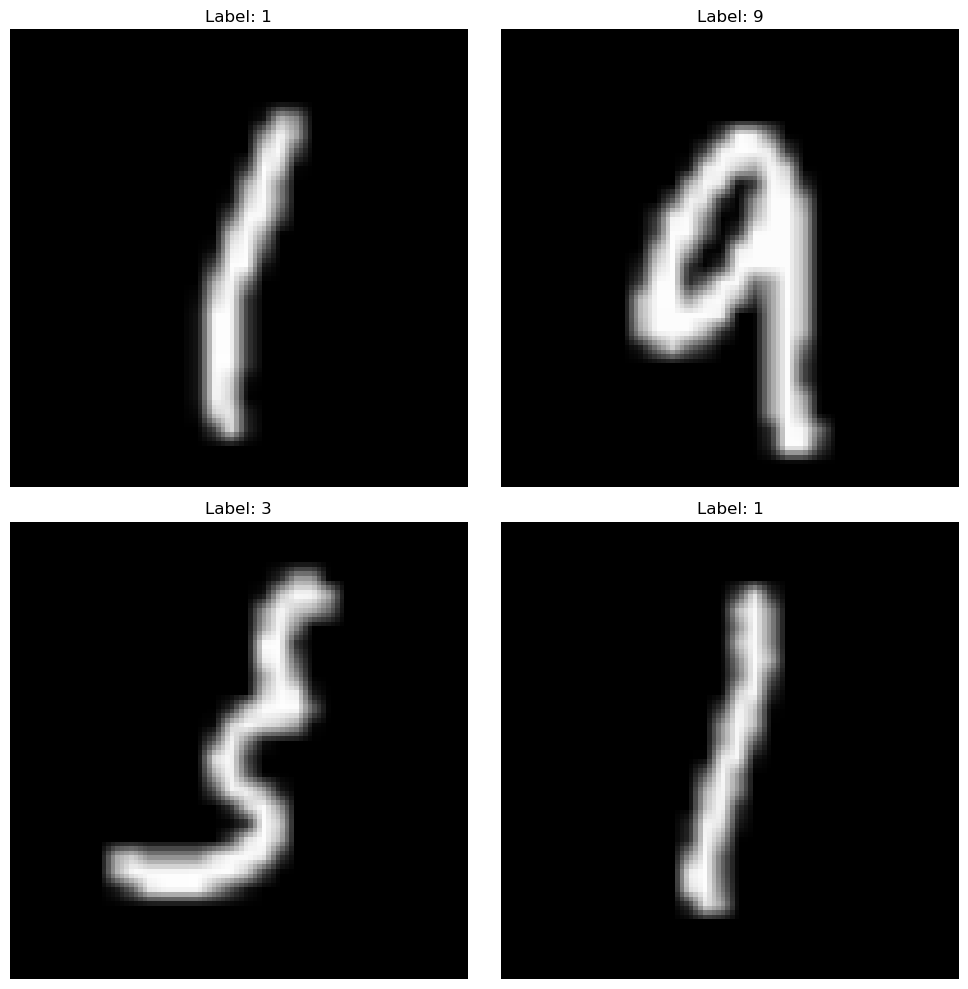

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 从 DataLoader 中获取一个批次的数据
batch = next(iter(dataloader))  # 获取第一个批次
params, images = batch

# 转换为 NumPy 格式
params = params.numpy()  # 参数（标签）
images = images.numpy()  # 图像（100x100）

# 可视化前4个样本
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for i in range(4):
    # 显示图像
    axes[i].imshow(images[i], cmap='gray', vmin=0, vmax=255)
    axes[i].axis('off')
    
    # 显示参数（标签）
    axes[i].set_title(f"Label: {int(params[i])}")

plt.tight_layout()
plt.show()

In [7]:
class SurrogateModel(nn.Module):
    def __init__(self, input_dim=1, output_size=(100, 100)):
        super(SurrogateModel, self).__init__()
        self.output_size = output_size
        
        # 编码器：将1维标签映射到特征空间
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
        )
        
        # 上采样生成图像
        self.decoder = nn.Sequential(
            nn.Linear(256, 256 * 4 * 4),
            nn.Unflatten(1, (256, 4, 4)),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),   # 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),    # 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),     # 64x64
            nn.ReLU(),
            nn.Upsample(size=output_size, mode='bilinear'),                    # 100x100
            nn.Sigmoid()  # 输出归一化到[0,1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x.squeeze(1) * 255  # 输出尺寸: 100x100

In [ ]:
# 超参数
BATCH_SIZE = 32
EPOCHS = 20
LR = 0.001

# 初始化模型、损失函数、优化器
model = SurrogateModel(input_dim=1)
criterion = nn.MSELoss()  # 比较生成的图像与真实图像
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# 加载MNIST数据集
dataset = SyntheticDataset(root='./data')
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# 训练循环
for epoch in range(EPOCHS):
    total_loss = 0.0
    for params, images in dataloader:
        optimizer.zero_grad()
        
        # 输入参数（标签）和真实图像
        outputs = model(params.unsqueeze(1))  # 输入形状: (B,1)
        loss = criterion(outputs, images)
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

In [ ]:
for params, images in dataloader:
    print(images.shape)